<a href="https://colab.research.google.com/github/ParamitaDas18/ML_Lab_Codes/blob/main/china_gdp_nonlinear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!ls


sample_data  Year,GDP.txt


Fitted parameters: a=21812213104512.426, b=0.22076967934489014, c=2014.3500894267008
R² Score: 0.9984
MSE: 16333660979916923994112.00
RMSE: 127803211931.14


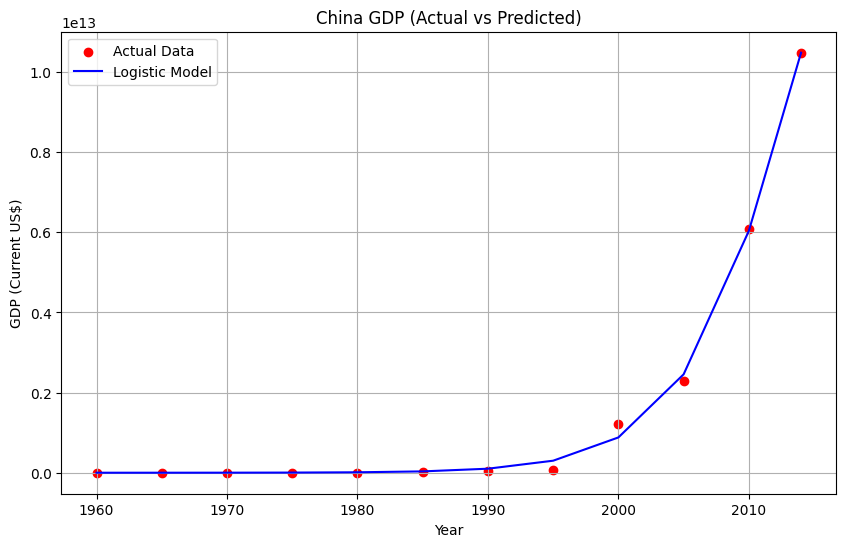

In [3]:
#3.  Perform  linear  regression  with  one  feature  using  gradient  descent
 #(without  using  library function)  to  predict  the  salary  of  an  employee  based  on  the  feature  Years  Experience.  Use
#hyper-parameter  tuning  for  the  best  result.  Plot  the  hypothesis  function  and  the  data  points
#after  each  epoch.  Evaluate  the  accuracy  of  the  models  by  computing  relevant  performance
#metrics, including the R² value.
#Dataset: salary_dataset.csv

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score, mean_squared_error

# 1. Load dataset
data = pd.read_csv("Year,GDP.txt")
X = data["Year"].values
y = data["GDP"].values

# 2. Define logistic function (typical for GDP growth modeling)
def logistic_function(x, a, b, c):
    return a / (1 + np.exp(-b * (x - c)))

# 3. Initial parameter guess
p0 = [max(y), 0.02, 1990]  # [maximum GDP, growth rate, inflection year]

# 4. Curve fitting
popt, pcov = curve_fit(logistic_function, X, y, p0=p0, maxfev=10000)

# Extract parameters
a, b, c = popt
print(f"Fitted parameters: a={a}, b={b}, c={c}")

# 5. Predict values
y_pred = logistic_function(X, a, b, c)

# 6. Evaluate model
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)

print(f"R² Score: {r2:.4f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")

# 7. Plot Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(X, y, label="Actual Data", color="red")
plt.plot(X, y_pred, label="Logistic Model", color="blue")
plt.title("China GDP (Actual vs Predicted)")
plt.xlabel("Year")
plt.ylabel("GDP (Current US$)")
plt.legend()
plt.grid(True)
plt.show()